<a href="https://colab.research.google.com/github/ethanlin1126/Data_Mining/blob/main/%E3%80%8CExample1_DataLoading_ipynb%E3%80%8D%E7%9A%84%E5%89%AF%E6%9C%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Education & Career Success

https://www.kaggle.com/datasets/adilshamim8/education-and-career-success?resource=download

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)

In [9]:
import pandas as pd
# read data and put it in a dataframe
# 在 google 工作表載入 gsheets
gsheets = gc.open_by_url('https://docs.google.com/spreadsheets/d/1fhF1E8rnyEAqBwjl8q48w58KO7r06sjs1kwKheJHHKY/edit?gid=1406674434#gid=1406674434')

In [11]:
# 從 gsheets 的 All-whiteboard-device 載入 sheets
sheets = gsheets.worksheet('education_career_success').get_all_values()
# 將 sheets1 資料載入 pd 的 DataFrame 進行分析
df = pd.DataFrame(sheets[1:], columns=sheets[0])
# 取得最前面的5筆資料
df.head()

,Student_ID,Age,Gender,High_School_GPA,SAT_Score,University_Ranking,University_GPA,Field_of_Study,Internships_Completed,Projects_Completed,Certifications,Soft_Skills_Score,Networking_Score,Job_Offers,Starting_Salary,Career_Satisfaction,Years_to_Promotion,Current_Job_Level,Work_Life_Balance,Entrepreneurship
0,S00001,24,Male,3.58,1052,291,3.96,Arts,3,7,2,9,8,5,27200,4,5,Entry,7,No
1,S00002,21,Other,2.52,1211,112,3.63,Law,4,7,3,8,1,4,25000,1,1,Mid,7,No
2,S00003,28,Female,3.42,1193,715,2.63,Medicine,4,8,1,1,9,0,42400,9,3,Entry,7,No
3,S00004,25,Male,2.43,1497,170,2.81,Computer Science,3,9,1,10,6,1,57400,7,5,Mid,5,No
4,S00005,22,Male,2.08,1012,599,2.48,Engineering,4,6,4,10,9,4,47600,9,5,Entry,2,No


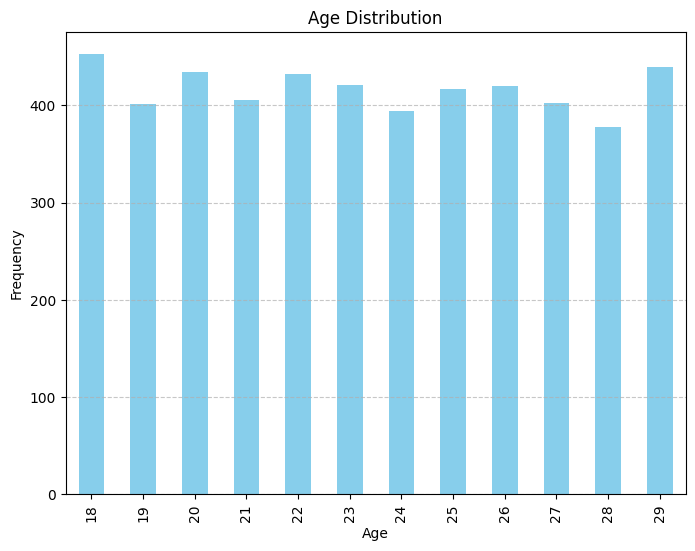

In [32]:
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and contains an 'Age' column
if 'Age' in df.columns:
    # Plot the distribution of ages as a bar chart
    age_counts = df['Age'].value_counts().sort_index()  # Count occurrences of each age
    plt.figure(figsize=(8, 6))
    age_counts.plot(kind='bar', color='skyblue')
    plt.title('Age Distribution')
    plt.xlabel('Age')
    plt.ylabel('Frequency')
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()
else:
    print("DataFrame does not contain the 'Age' column.")


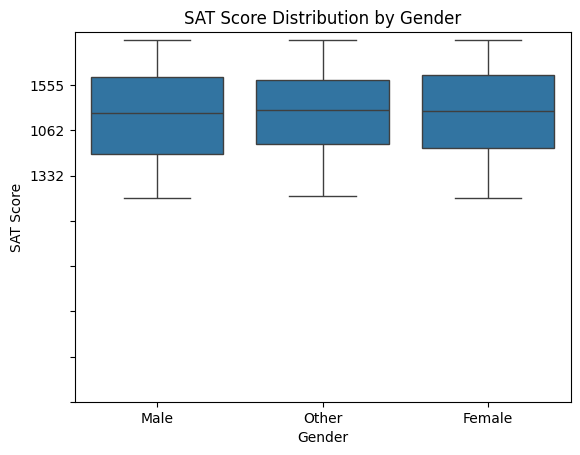

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

# 繪製盒鬚圖
sns.boxplot(x='Gender', y='SAT_Score', data=df)

# 設定 x, y 標籤
plt.xlabel('Gender')
plt.ylabel('SAT Score')
plt.title('SAT Score Distribution by Gender')

# 設定 y 軸刻度，使其清楚顯示
plt.yticks([200, 400, 600, 800, 1000, 1200, 1400, 1600])

# 顯示圖表
plt.show()


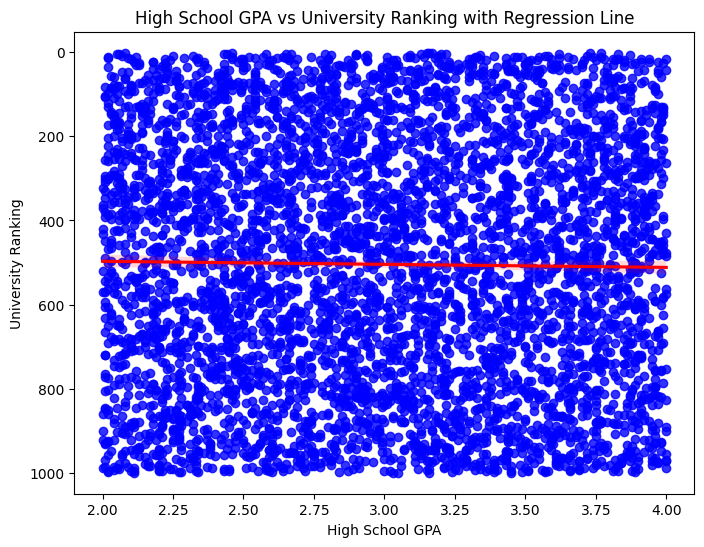

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming your DataFrame is named df and contains 'High_School_GPA' and 'University_Ranking' columns
if 'High_School_GPA' in df.columns and 'University_Ranking' in df.columns:
    plt.figure(figsize=(8, 6))

    # Scatter plot with regression line
    sns.regplot(x='High_School_GPA', y='University_Ranking', data=df, scatter_kws={'color': 'b'}, line_kws={'color': 'r'})

    # Add title and labels
    plt.title('High School GPA vs University Ranking with Regression Line')
    plt.xlabel('High School GPA')
    plt.ylabel('University Ranking')

    # Invert the y-axis for rankings (higher rank = lower number)
    plt.gca().invert_yaxis()

    plt.show()
else:
    print("DataFrame does not contain the necessary columns: 'High_School_GPA' and 'University_Ranking'")
